
<font size = "5"> **Chapter 4: [Spectroscopy](CH4-Spectroscopy.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />



## Introduction to  Electron Energy-Loss Spectroscopy


[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM/main/Spectroscopy/CH4_01-Introduction.ipynb)
 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main/Spectroscopy/CH4_01-Introduction.ipynb)


part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Spring 2021

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes.


## Content


## Load important packages

### Check Installed Packages

In [ ]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = get_distribution(package_name).version
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version

# Colab setup ------------------
if 'google.colab' in sys.modules:
    !pip install pyTEMlib -q
# pyTEMlib setup ------------------
else:
    if test_package('pyTEMlib') < '0.2021.3.22':
        print('installing pyTEMlib')
        !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

### Import all relevant libraries

Please note that the EELS_tools package from pyTEMlib is essential.

In [2]:
import sys
if 'google.colab' in sys.modules:
    %pylab --no-import-all inline
else:    
    %pylab --no-import-all notebook
    %gui qt
    
import warnings
warnings.filterwarnings('ignore')

# Import libraries from the book
import pyTEMlib
import pyTEMlib.file_tools as ft          # File input/ output library
from pyTEMlib import eels_tools  

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)

Populating the interactive namespace from numpy and matplotlib
pyTEM version:  0.2021.04.02


## Introduction

### Parts of an EELS Spectrum:


![EELS spectrum](images/EELS.jpg "Title")


1. No energy transfer

>The zero--loss peak is caused by electrons of the acceleration energy which apparently did not loose any energy (or only a tiny amount in a quasi--elastic scattering). 

2. Little energy transfer: 1-70 eV

>The valence--loss region shows intraband, interband, and plasmon  transitions.

3. High energy transfer: above 70eV

>The core--loss region contains excitation from the atom core levels into the conduction band appear as saw tooth like edges.


### Inelastic Excitation
Energy is transfered to an atom in ground state and after a while (femto seconds) this atoms will change its electron levels and shell occupations and becomes an excited atom.


<img title="inelastic excitation" width="50%" alt="inelastic excitation" src="images/inelastic2.jpg">


After some time (femto seconds to minutes) this atoms falls back to the ground state and after a little while longer (femto seconds), the atom emits this energy either in form of photons (in the light and  X-ray spectrum)  or Auger electron. 


So we have two obervable processes:

1. energy transfer to the atom in ground state

> primary energy transfer

       - electron energy-loss spectroscopy

2. excited atom emitting energy

> secondary processes

       - Auger spectroscopy
       - energy-dispersive X-ray spectroscopy
       - Cathodoluminescence
  

### EELS Spectrometer

We use a magnetic field to bend the electron beam (here 90$^{\rm o}$) which acts like a prism for light and separates the electrons by spead (kinetic energy). The faster electrons will get bent less. 

<img title="EELS spectrometer" width="50%" alt="EELS spectrometer and prism" src="images/EELS_Spectrometer.jpg">

With such a prism for electrons we can determine the energy lost in the sample. 



### EELS and STEM

The advantage of EELS in STEM mode is that we get a HAADF signal and the bright field signal is analysed with EELS spectroscopy. So we get spatially resolved image and chemical information simultaneously.

<img title="EELS and STEM" width="50%" alt="EELS and STEM" src="images/Z-Contrast.jpg">

## Load an EELS Spectrum


<IPython.core.display.Javascript object>


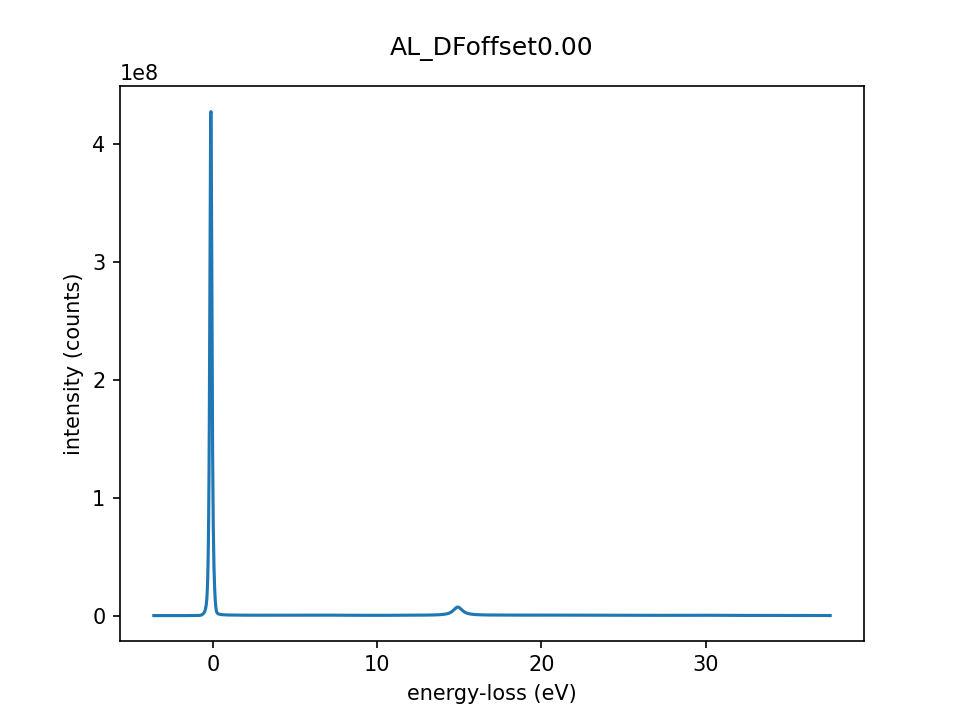

In [3]:
# Load file
filename = '../example_data/AL-DFoffset0.00.dm3'
eels_dataset = ft.open_file(filename)
eels_dataset.plot()

### Important Parameters in an EELS spectrum

A lot of information is stored in the ``original_metadata``. 

We will learn in this ``Spectroscopy`` section of the lecture which ones are absolutely necessary. 

In [4]:
eels_dataset.view_original_metadata()

DM :
	file_version : 3
	file_size : 322288
	chosen_image : 1
	full_file_name : ../example_data/AL-DFoffset0.00.dm3
ApplicationBounds : [0, 0, 1465, 2236]
DocumentObjectList :
	0 :
		AnnotationGroupList :
		AnnotationType : 20
		BackgroundColor : [-1, -1, -1]
		BackgroundMode : 2
		FillMode : 2
		ForegroundColor : [-1, 0, -32640]
		HasBackground : False
		ImageDisplayInfo :
			BackgroundOn : True
			CalibrationSliceId :
				0 : 0
			CaptionOn : True
			CaptionSize : 10
			CursorOn : False
			CursorPosition : 0.0
			DimensionLabels :
				0 : 
			FrameOn : True
			GridOn : True
			GroupId : 0
			GroupList :
				0 :
					DoAutoSurveyHigh : False
					DoAutoSurveyLow : False
					GroupToDisplay :
						Offset : [0.159382164478302, 4.566257121041417e-05]
						Scale : [0.00034526686067692935, 1.484737140344805e-06]
					TrackStyleX : 0
					TrackStyleY : 0
			LegendOn : False
			MainSliceId :
				0 : 0
			NumHorizontalTicks : True
			NumVerticalTicks : True
			ROIList :
				0 :
					BoldLabe

					Exposure (s) : 0.1
					Integration time (s) : 10.0
					Number of frames : 100
					Saturation fraction : 0.7989057898521423
					Start time : 11:10:22 AM
				Experimental Conditions :
					Collection semi-angle (mrad) : 100.0
					Convergence semi-angle (mrad) : 0.0
			Meta Data :
				Acquisition Mode : Parallel dispersive
				Format : Spectrum
				Signal : EELS
			Microscope Info :
				Cs(mm) : 2.2
				Emission Current (µA) : 230.0
				Formatted Indicated Mag : 100kx
				Formatted Voltage : 200.0kV
				Illumination Mode : TEM
				Imaging Mode : Image Mag
				Indicated Magnification : 100000.0
				Items :
					0 :
						Data Type : 20
						Label : Specimen
						Tag path : Microscope Info:Specimen
						Value : Fe-9Cr(0.3Y)-3E10(17)-475C
					1 :
						Data Type : 20
						Label : Operator
						Tag path : Microscope Info:Operator
						Value : Tengfei Yang
					2 :
						Data Type : 20
						Label : Microscope
						Tag path : Microscope Info:Microscope
						Value : Libra 200

The information is contained in a python dictionary and we will have to data mine this information to get the experimental conditions.

In [5]:
for key in eels_dataset.original_metadata:
    print(key)
print()
print(" Dictionary: original_metadata['ImageList']['1']['ImageTags']['EELS']['Acquisition'] ")
for key, item  in eels_dataset.original_metadata['ImageList']['1']['ImageTags']['EELS']['Acquisition'].items():
    print(key, item)

DM
ApplicationBounds
DocumentObjectList
DocumentTags
HasWindowPosition
Image Behavior
ImageList
ImageSourceList
InImageMode
MinVersionList
NextDocumentObjectID
Page Behavior
PageSetup
SentinelList
Thumbnails
WindowPosition

 Dictionary: original_metadata['ImageList']['1']['ImageTags']['EELS']['Acquisition'] 
Continuous mode 0
Date 10/1/2018
End time 11:12:22 AM
Exposure (s) 0.1
Integration time (s) 10.0
Number of frames 100
Saturation fraction 0.7989057898521423
Start time 11:10:22 AM


Of course there is a function for this (in pyTEMlib.eels_tools).

In [6]:
eels_dataset.metadata = eels_tools.read_dm3_eels_info(eels_dataset.original_metadata)
eels_dataset.view_metadata()

single_exposure_time : 0.1
exposure_time : 10.0
number_of_frames : 100
collection_angle : 100.0
convergence_angle : 0.0
acceleration_voltage : 199990.28125
microscope : Libra COM


### Make Energy Scale andPlot

The energy scale above is linear and so a linear increasing numpy array (of size *eels_dataset.shape[0]*)  is multiplied with the channel width (*sipersion*), the first channel is in the variable *offset*.

Dispersion [eV/pixel] : 0.02 eV 
Offset [eV] : -3.61 eV 
Maximum energy [eV] : 37.59 eV 


<IPython.core.display.Javascript object>


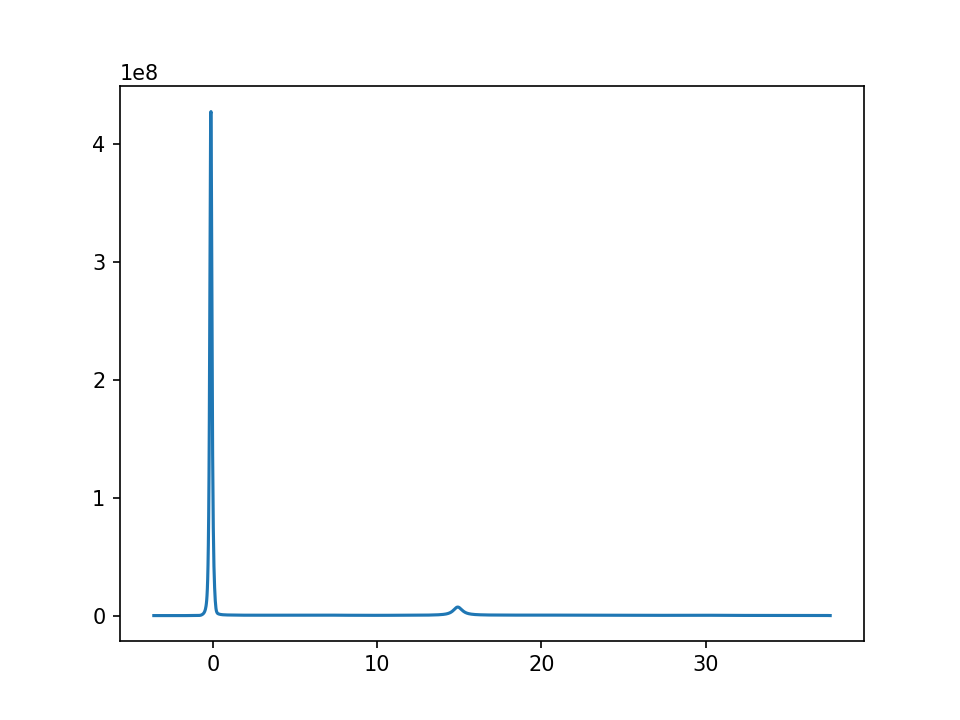

In [7]:
print(f"Dispersion [eV/pixel] : {ft.get_slope(eels_dataset.energy_loss):.2f} eV ")
print(f"Offset [eV] : {eels_dataset.energy_loss[0]:.2f} eV ")
print(f"Maximum energy [eV] : {eels_dataset.energy_loss[-1]:.2f} eV ")

energy_scale = np.arange(eels_dataset.shape[0])

dispersion = ft.get_slope(eels_dataset.energy_loss)
energy_scale = energy_scale * dispersion

offset = eels_dataset.energy_loss[0]
energy_scale = energy_scale + offset

plt.figure()
plt.plot(energy_scale, eels_dataset);


Let's compare the keys in the current_channel and  in the dictionary 

### Normalizing Intensity Scale
The following normalization makes only sense if this is a low loss spectrum, <br> where the total number of counts represents approximatively the incident current **$I_0$**

<IPython.core.display.Javascript object>


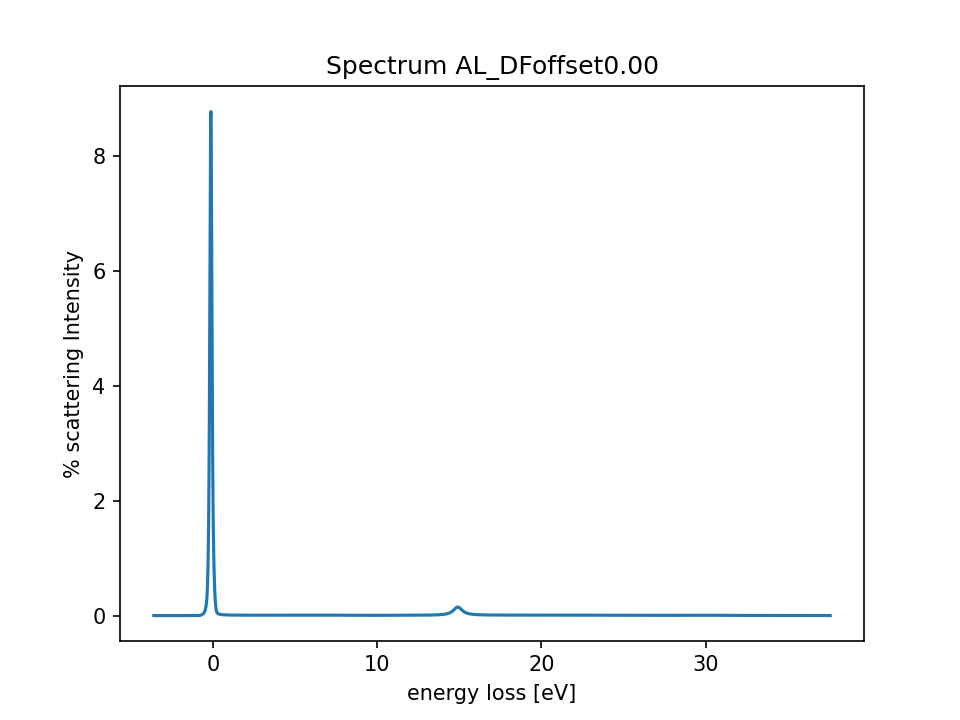

In [8]:
I_0 = sumSpec = float(np.sum(np.array(eels_dataset)))
plt.figure()
plt.plot(energy_scale,eels_dataset/sumSpec*1e2)
plt.title ('Spectrum '+eels_dataset.title);
plt.xlabel('energy loss [eV]')
plt.ylabel('% scattering Intensity');
#plt.xlim(-10,50)
#plt.ylim(0,8);


### Close File
Close the **h5_file** to make it available for aother notebooks

In [ ]:
eels_dataset.h5_dataset.file.close()

## Navigation
- <font size = "3">  **Up Chapter 4: [Imaging](CH4_00-Spectroscopy.ipynb)** </font>
- <font size = "3">  **Back: [Overview](CH4_00-Spectroscopy.ipynb)** </font>
- <font size = "3">  **Next:  [Fit Zero-Loss](CH4-01Fit_Zero_Loss.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>
